Deliverables:

- Write down your codes in the given cells described in this file, denoted as "YOUR CODE HERE"
- Use "download as" in the "file" menu to convert your ipython file to a .html file
- Submit both .ipynb and .html files to the eLearning (you might need to compress them into one single file)


This assignment covers machine learning models


The total score: 100

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [73]:
from IPython.core.interactiveshell import InteractiveShell   # print all the result
InteractiveShell.ast_node_interactivity = "all"

# Part I Prediction

In [74]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [75]:
data = pd.read_csv(r'C:\Users\user\Desktop\python programming\Assignment 3\daily_weather.csv')
# data

## Daily Weather Data Description (60 points)

<br>
The file **daily_weather.csv** is a comma-separated file that contains weather data.  This data comes from a weather station located in San Diego, California.  The weather station is equipped with sensors that capture weather-related measurements such as air temperature, air pressure, and relative humidity.  Data was collected for a period of three years, from September 2011 to September 2014, to ensure that sufficient data for different seasons and weather conditions is captured.<br><br>
Let's now check all the columns in the data.

<br>Each row in daily_weather.csv captures weather data for a separate day.  <br><br>
Sensor measurements from the weather station were captured at one-minute intervals.  These measurements were then processed to generate values to describe daily weather. Since this dataset was created to classify low-humidity days vs. non-low-humidity days (that is, days with normal or high humidity), the variables included are weather measurements in the morning, with one measurement, namely relatively humidity, in the afternoon.  The idea is to use the morning weather values to predict whether the day will be low-humidity or not based on the afternoon measurement of relative humidity.

Each row, or sample, consists of the following variables:

* **number:** unique number for each row
* **air_pressure_9am:** air pressure averaged over a period from 8:55am to 9:04am (*Unit: hectopascals*)
* **air_temp_9am:** air temperature averaged over a period from 8:55am to 9:04am (*Unit: degrees Fahrenheit*)
* **air_wind_direction_9am:** wind direction averaged over a period from 8:55am to 9:04am (*Unit: degrees, with 0 means coming from the North, and increasing clockwise*)
* **air_wind_speed_9am:** wind speed averaged over a period from 8:55am to 9:04am (*Unit: miles per hour*)
* ** max_wind_direction_9am:** wind gust direction averaged over a period from 8:55am to 9:10am (*Unit: degrees, with 0 being North and increasing clockwise*)
* **max_wind_speed_9am:** wind gust speed averaged over a period from 8:55am to 9:04am (*Unit: miles per hour*)
* **rain_accumulation_9am:** amount of rain accumulated in the 24 hours prior to 9am (*Unit: millimeters*)
* **rain_duration_9am:** amount of time rain was recorded in the 24 hours prior to 9am (*Unit: seconds*)
* **relative_humidity_9am:** relative humidity averaged over a period from 8:55am to 9:04am (*Unit: percent*)
* **relative_humidity_3pm:** relative humidity averaged over a period from 2:55pm to 3:04pm (*Unit: percent *)

In [76]:
data.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

In [77]:
del data['number']
data = data.dropna()
# data

In [78]:
# Binarize the relative_humidity_3pm to 0 or 1.

clean_data = data.copy()
clean_data['high_humidity_label'] = (clean_data['relative_humidity_3pm']>24.99)*1
clean_data

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm,high_humidity_label
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000,1
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597,0
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000,0
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547,0
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000,1
...,...,...,...,...,...,...,...,...,...,...,...
1090,918.900000,63.104000,192.900000,3.869906,207.300000,5.212070,0.0,0.0,26.020000,38.180000,1
1091,918.710000,49.568000,241.600000,1.811921,227.400000,2.371156,0.0,0.0,90.350000,73.340000,1
1092,916.600000,71.096000,189.300000,3.064608,200.800000,3.892276,0.0,0.0,45.590000,52.310000,1
1093,912.600000,58.406000,172.700000,3.825167,189.100000,4.764682,0.0,0.0,64.840000,58.280000,1


In [79]:
y = clean_data[['high_humidity_label']]
y
type(y)
y.shape

,high_humidity_label
0,1
1,0
2,0
3,0
4,1
...,...
1090,1
1091,1
1092,1
1093,1


pandas.core.frame.DataFrame

(1064, 1)

In [80]:
# Use 9am Sensor Signals as Features to Predict Humidity at 3pm

morning_features = ['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am']

In [81]:
X = clean_data[morning_features]

In [82]:
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=23)
X_train
y_train

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am
324,917.54,71.384,219.5,2.169832,202.4,2.706697,3.60,10970.0
715,923.60,65.030,62.3,7.091100,75.1,8.410894,0.00,0.0
973,922.12,55.580,51.9,14.294047,72.2,19.013990,0.00,0.0
181,915.63,72.356,165.3,3.802798,179.0,5.256809,0.00,0.0
407,918.69,48.902,200.4,4.473880,222.1,6.084477,0.00,0.0
...,...,...,...,...,...,...,...,...
240,920.02,49.946,183.4,8.388525,193.7,9.820167,0.00,0.0
32,918.70,76.226,184.6,4.093600,194.9,4.742313,0.00,0.0
976,917.00,44.636,174.2,10.088599,186.7,12.728189,0.76,1500.0
763,919.43,60.584,77.6,2.147462,96.1,3.758059,0.00,0.0


,high_humidity_label
324,1
715,1
973,0
181,1
407,1
...,...
240,1
32,1
976,1
763,1


**Complete the following tasks**:

- Train a logistic regression model (10 points)
- Train a SVM model by tunning both C and gamma, report the best parameters (15 points)
- Train a decision tree model by tuning the proper parameters, report the best parameters (15 points)
- Use the same parameters to train a random forest model (10 points)
- Compare all the above models' performance (10 points)


In [89]:
# Logistics regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
logreg = LogisticRegression(random_state = 0,max_iter=10000)
c_param = {'C':[0.001,0.01,0.1,1,10,100]}
grid_search = GridSearchCV(logreg, c_param, cv=5,scoring = 'roc_auc', return_train_score=True )
grid_search.fit(X_train, y_train.values.ravel())

print("Training set score: {:.3f}".format(grid_search.score(X_train, y_train)))
print("Test set score: {:.3f}".format(grid_search.score(X_test, y_test)))
print('Best parameters: ',grid_search.best_params_)


logis_y_pred = grid_search.predict(X_test)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000, random_state=0),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True, scoring='roc_auc')

Training set score: 0.803
Test set score: 0.800
Best parameters:  {'C': 10}


In [90]:
# SVM model
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc_kernel = SVC(random_state = 0,kernel = 'rbf')
param_svc_kernel = {'C': [0.1,1,10,100,1000,10000],'gamma':[0.0001,0.001,0.01,0.1,1,10]}
grid_svc_kernel = GridSearchCV(svc_kernel, param_svc_kernel, scoring = 'roc_auc',cv=5, n_jobs=-1,return_train_score= True)
grid_svc_kernel.fit(X_train, y_train.values.ravel())

print('train score: ', grid_svc_kernel.score(X_train, y_train))
print('test score: ', grid_svc_kernel.score(X_test, y_test))
print('Best parameters: ',grid_svc_kernel.best_params_)

svm_y_pred = grid_svc_kernel.predict(X_test)

GridSearchCV(cv=5, estimator=SVC(random_state=0), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             return_train_score=True, scoring='roc_auc')

train score:  0.9919656766671692
test score:  0.891803092958704
Best parameters:  {'C': 1, 'gamma': 0.01}


In [91]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
opt_tree = DecisionTreeClassifier(random_state = 0)
param_DT = {"max_depth": range(1,10),
           "min_samples_split": range(2,10,1),
           "max_leaf_nodes": range(2,5)}
grid_tree = GridSearchCV(opt_tree,param_DT,cv=5)
grid_tree.fit(X_train,y_train)

print('train score: ',grid_tree.score(X_train,y_train))
print('test score: ',grid_tree.score(X_test,y_test))
print('Best parameters: ',grid_tree.best_params_)

tree_y_pred = grid_tree.predict(X_test)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(1, 10),
                         'max_leaf_nodes': range(2, 5),
                         'min_samples_split': range(2, 10)})

train score:  0.7694235588972431
test score:  0.7481203007518797
Best parameters:  {'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_split': 2}


In [92]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(max_depth=2,max_leaf_nodes=4,min_samples_split=2, n_jobs=-1, random_state=0)
rnd_clf.fit(X_train, y_train.values.ravel())

print('train score: ',rnd_clf.score(X_train,y_train))
print('test score: ',rnd_clf.score(X_test,y_test))

random_y_pred = rnd_clf.predict(X_test)

RandomForestClassifier(max_depth=2, max_leaf_nodes=4, n_jobs=-1, random_state=0)

train score:  0.7982456140350878
test score:  0.7744360902255639
0.7744360902255639


In [96]:
print('Logistic Regression-Accuracy score: {:.4f}'.format(accuracy_score(y_test, logis_y_pred)))
print('SVM Model-Accuracy score: {:.4f}'.format(accuracy_score(y_test, svm_y_pred)))
print('Decision Tree-Accuracy score: {:.4f}'.format(accuracy_score(y_test, tree_y_pred)))
print('Random Forest-Accuracy score: {:.4f}'.format(accuracy_score(y_test, random_y_pred)))

Logistic Regression-Accuracy score: 0.7180
SVM Model-Accuracy score: 0.8459
Decision Tree-Accuracy score: 0.7481
Random Forest-Accuracy score: 0.7744


# Part II Clustering (40 points)

In [98]:
data = pd.read_csv(r'C:\Users\user\Desktop\python programming\Assignment 3\minute_weather.csv')
# data

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587252,1587252,2014-09-10 23:55:29,915.9,74.66,1.0,1.8,11.0,2.1,357.0,1.6,0.0,0.0,46.3
1587253,1587253,2014-09-10 23:56:29,915.9,74.66,9.0,1.6,19.0,1.8,353.0,1.4,0.0,0.0,46.2
1587254,1587254,2014-09-10 23:57:29,915.9,74.66,15.0,1.7,42.0,2.3,353.0,1.2,0.0,0.0,46.3
1587255,1587255,2014-09-10 23:58:29,915.9,74.66,8.0,1.8,24.0,2.2,355.0,1.4,0.0,0.0,46.2


## Weather data

The **minute weather dataset** comes from the same source as the daily weather dataset that we used in the decision tree based classifier notebook. The main difference between these two datasets is that the minute weather dataset contains raw sensor measurements captured at one-minute intervals. Daily weather dataset instead contained processed and well curated data. The data is in the file **minute_weather.csv**, which is a comma-separated file.

As with the daily weather data, this data comes from a weather station located in San Diego, California. The weather station is equipped with sensors that capture weather-related measurements such as air temperature, air pressure, and relative humidity. Data was collected for a period of three years, from September 2011 to September 2014, to ensure that sufficient data for different seasons and weather conditions is captured.

Each row in **minute_weather.csv** contains weather data captured for a one-minute interval. Each row, or sample, consists of the following variables:

* **rowID:** 	unique number for each row	(*Unit: NA*)
* **hpwren_timestamp:**	timestamp of measure	(*Unit: year-month-day hour:minute:second*)
* **air_pressure:** air pressure measured at the timestamp	(*Unit: hectopascals*)
* **air_temp:**	air temperature measure at the timestamp	(*Unit: degrees Fahrenheit*)
* **avg_wind_direction:**	wind direction averaged over the minute before the timestamp	(*Unit: degrees, with 0 means coming from the North, and increasing clockwise*)
* **avg_wind_speed:**	wind speed averaged over the minute before the timestamp	(*Unit: meters per second*)
* **max_wind_direction:**	highest wind direction in the minute before the timestamp	(*Unit: degrees, with 0 being North and increasing clockwise*)
* **max_wind_speed:**	highest wind speed in the minute before the timestamp	(*Unit: meters per second*)
* **min_wind_direction:**	smallest wind direction in the minute before the timestamp	(*Unit: degrees, with 0 being North and inceasing clockwise*)
* **min_wind_speed:**	smallest wind speed in the minute before the timestamp	(*Unit: meters per second*)
* **rain_accumulation:**	amount of accumulated rain measured at the timestamp	(*Unit: millimeters*)
* **rain_duration:**	length of time rain has fallen as measured at the timestamp	(*Unit: seconds*)
* **relative_humidity:**	relative humidity measured at the timestamp	(*Unit: percent*)

In [99]:
data.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'rain_accumulation', 'rain_duration', 'relative_humidity'],
      dtype='object')

In [100]:
data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [101]:
data.shape

(1587257, 13)

In [103]:
#Lots of rows, so let us sample down by taking every 10th row.
sampled_df = data[(data['rowID']%10) == 0]
sampled_df
sampled_df.shape

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
10,10,2011-09-10 00:10:49,912.3,62.24,144.0,1.2,167.0,1.8,115.0,0.6,0.0,0.0,38.5
20,20,2011-09-10 00:20:49,912.2,63.32,100.0,2.0,122.0,2.5,91.0,1.5,0.0,0.0,58.3
30,30,2011-09-10 00:30:49,912.2,62.60,91.0,2.0,103.0,2.4,71.0,1.4,0.0,0.0,57.9
40,40,2011-09-10 00:40:49,912.2,64.04,81.0,2.6,88.0,2.9,68.0,1.4,0.0,0.0,57.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587210,1587210,2014-09-10 23:13:29,915.9,75.56,330.0,1.0,341.0,1.3,310.0,0.8,0.0,0.0,47.8
1587220,1587220,2014-09-10 23:23:29,915.9,75.56,330.0,1.1,341.0,1.4,316.0,0.9,0.0,0.0,48.0
1587230,1587230,2014-09-10 23:33:29,915.9,75.56,344.0,1.4,352.0,1.7,338.0,1.2,0.0,0.0,48.0
1587240,1587240,2014-09-10 23:43:29,915.9,75.20,359.0,1.3,9.0,1.6,347.0,1.0,0.0,0.0,46.3


(158726, 13)

In [104]:
sampled_df = sampled_df.dropna()

In [106]:
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']

In [107]:
select_df = sampled_df[features]

In [109]:
#Standardize the Features using StandardScaler
from sklearn.preprocessing import StandardScaler
select_df
X = StandardScaler().fit_transform(select_df)
X
X.shape

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
10,912.3,62.24,144.0,1.2,167.0,1.8,38.5
20,912.2,63.32,100.0,2.0,122.0,2.5,58.3
30,912.2,62.60,91.0,2.0,103.0,2.4,57.9
40,912.2,64.04,81.0,2.6,88.0,2.9,57.4
50,912.1,63.68,102.0,1.2,119.0,1.5,51.4
...,...,...,...,...,...,...,...
1587210,915.9,75.56,330.0,1.0,341.0,1.3,47.8
1587220,915.9,75.56,330.0,1.1,341.0,1.4,48.0
1587230,915.9,75.56,344.0,1.4,352.0,1.7,48.0
1587240,915.9,75.20,359.0,1.3,9.0,1.6,46.3


array([[-1.48457779,  0.03247287, -0.1905634 , ...,  0.03826302,
        -0.66172102, -0.34710411],
       [-1.51734678,  0.1237468 , -0.65236961, ..., -0.44847591,
        -0.372321  ,  0.40839584],
       [-1.51734678,  0.06289752, -0.74682997, ..., -0.6539879 ,
        -0.41366386,  0.39313322],
       ...,
       [-0.30489432,  1.15818466,  1.90855574, ...,  2.03930084,
        -0.70306388,  0.01538324],
       [-0.30489432,  1.12776002,  2.06598967, ..., -1.67073143,
        -0.74440674, -0.04948292],
       [-0.30489432,  1.09733538, -1.6389556 , ..., -1.55175081,
        -0.62037816, -0.05711423]])

(158679, 7)

**Complete the following tasks**:

- Train a KMeans clustering model. (20 points)
- Visualize the differences of feature "air_temp" among different clusters. Any visualiztion types could be accepted.  (20 points)

Note: you should select a value of k, based on which you are able to observe differences among clusters.


In [122]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

Text(0.5, 0, 'k')

Text(0, 0.5, 'Sum_of_squared_distances')

Text(0.5, 1.0, 'Elbow Method For Optimal k')

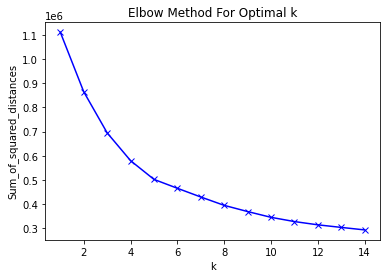

The optimal number of cluster is : 5


In [135]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
print('The optimal k value is : 5' )

In [146]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
a=X[:,[0,1]]
kmeans.fit(a)
y_kmeans = kmeans.predict(a)

KMeans(n_clusters=5)

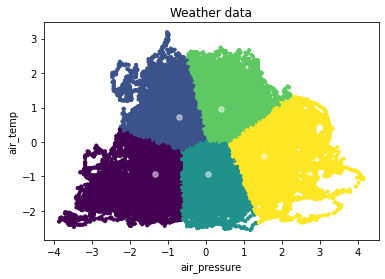

In [148]:
plt.scatter(a[:, 0], a[:, 1], c=y_kmeans, s=10, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='white', s=30, alpha=0.5)
plt.title('Weather data')
plt.xlabel('air_pressure')
plt.ylabel('air_temp')
plt.show();